# Data Preparation

Data Preparation is a crucial step in any machine learning project. Proper preparation ensures that the data is clean, relevant, and in a format that can be effectively used by machine learning algorithms. In the context of our project, where we aim to predict whether a customer will subscribe to a bank term deposit based on various attributes

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [5]:
df = pd.read_csv('dataset/bank-additional-full.csv', sep = ';')

In [6]:
df.head(4)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.shape

(41188, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df = df.drop_duplicates()

**Data Cleaning**

* Missing Values: One of the first steps in data preparation is to check for and handle missing values. Missing data can cause issues with training models, and there are several strategies to deal with this, such as:
>* Removing rows or columns with missing values.
>* Imputing missing values using techniques like mean, median, or mode.

In our dataset, we checked for any missing values using df.isnull().sum() and found none.

* Duplicate Entries: Duplicate records can skew the results of our analysis. We used df.duplicated() to identify any duplicate records and removed them if necessary.

## Missing values

**Missing Attribute Values**: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques

In [10]:
df.replace('unknown', np.NaN, inplace=True)

In [11]:
print(df.isnull().sum())

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [12]:
df.dropna(inplace=True)

## Correlation Analysis

In [13]:
var_numerical = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx",
                "euribor3m", "nr.employed"]

In [14]:
var_categorical = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", 
                  "poutcome"]

In [15]:
print(len(var_categorical), len(var_numerical))

10 10


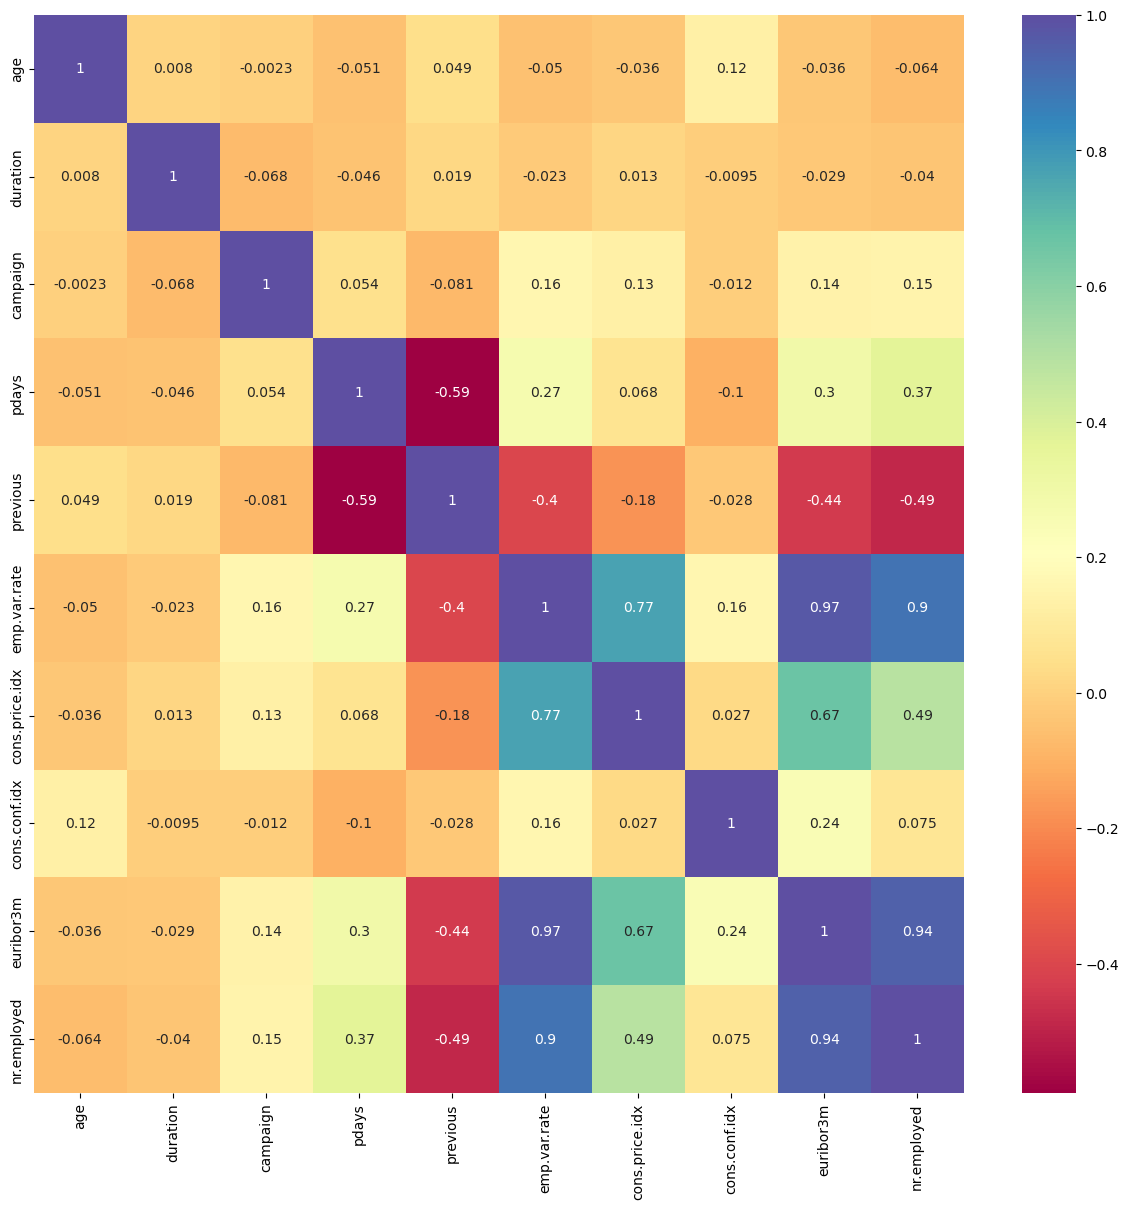

In [16]:
plt.figure(figsize=(15, 14))
sns.heatmap(df[var_numerical].corr(), annot=True, cmap='Spectral')
plt.show()

## Handle highly correlated variables

**Highly Correlated Pairs**:
* euribor3m and nr.employed: Correlation ≈ 0.94
* emp.var.rate and euribor3m: Correlation ≈ 0.97
* emp.var.rate and nr.employed: Correlation ≈ 0.9
* cons.price.idx and emp.var.rate: Correlation ≈ 0.77
* cons.price.idx and euribor3m: Correlation ≈ 0.67

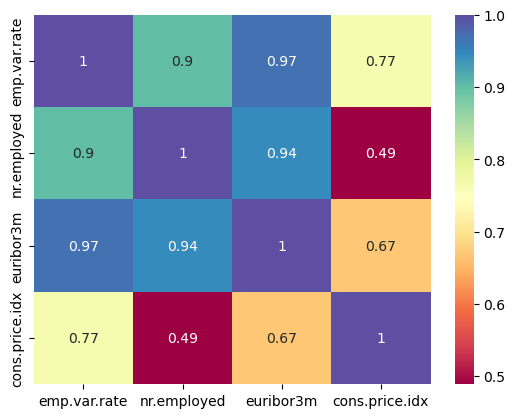

In [17]:
sns.heatmap(df[["emp.var.rate", "nr.employed", "euribor3m","cons.price.idx"]].corr(), annot=True, cmap='Spectral')
plt.show()

* **euribor3m** (Euro Interbank Offered Rate): Often closely linked to economic conditions, it can be a powerful predictor in financial datasets.This is the interest rate at which credit institutions lend money to each other
* **emp.var.rate**: Employment variation rate can also be quite useful as it reflects economic shifts, but it’s highly correlated with euribor3m.
* **nr.employed**: This is a high-level summary of employment, which is also correlated with economic conditions.
* **cons.price.idx**: This index captures inflation levels, which may provide unique insights that aren't fully captured by the others.

In [18]:
df.drop(['emp.var.rate', 'nr.employed'], axis = 1, inplace=True)

* Keep **euribor3m**: It has strong economic significance and captures much of the information in nr.employed and emp.var.rate.

* Drop **emp.var.rate** and **nr.employed**: Since both are highly correlated with euribor3m, and dropping them would help reduce multicollinearity without losing much information.

* Evaluate cons.price.idx: We will test the model's performance both with and without this feature to assess its importance.

In [19]:
var_numerical = list(set(var_numerical) - set(['emp.var.rate', 'nr.employed']))

# Data Preprocessing 

In [20]:
# Encoding binary categorical features
df['y'] = df['y'].map({'yes': 1, 'no': 0})

### Encode Categorical Variables

Machine learning algorithms generally work with numerical data, but our dataset contains several categorical features such as 'job', 'marital', 'education', etc. These categorical variables need to be encoded into numerical form. We used the following techniques:
* Label Encoding: Converts categories into numeric labels (e.g., "male" → 0, "female" → 1). This is useful for binary categorical features.
* One-Hot Encoding: For features with more than two categories, one-hot encoding was used to create binary columns for each category, ensuring that no ordinal relationships are implied.

In [21]:
# One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df)

In [22]:
df_encoded.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'po

In [23]:
len(df_encoded.columns)

56

## Handling Outliers

In [24]:
def cap_outliers(df, column):
    # Calculate the 5th and 95th percentiles
    lower_bound = np.percentile(df[column], 5)
    upper_bound = np.percentile(df[column], 95)
    
    # Cap the values
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

In [25]:
# Apply this function to the numerical columns in your dataframe
for col in df_encoded[var_numerical].columns:
    df_encoded = cap_outliers(df_encoded, col)

## Scaling Numerical Features

Many machine learning algorithms, such as Support Vector Machines (SVM) and K-Nearest Neighbors (KNN), are sensitive to the scale of the data. Since the dataset contains features with varying ranges (e.g., 'balance', 'duration', 'age'), we applied feature scaling to normalize these features.

In [26]:
# Scaling numerical features
scaler = StandardScaler()

In [27]:
# Create a copy of the DataFrame with only numerical columns
df_numerical = df_encoded[var_numerical]

In [28]:
# Apply scaling only to the numerical columns
df_numerical_scaled = scaler.fit_transform(df_numerical)

In [29]:
# Convert the scaled array back to a DataFrame with the same column names
df_numerical_sd = pd.DataFrame(df_numerical_scaled, columns=var_numerical)

In [30]:
len(df_numerical_sd), len(df_encoded)

(30478, 30478)

In [31]:
df_encoded=df_encoded.reset_index(drop=True)

In [32]:
# Drop the original numerical columns from the original DataFrame
df_encoded_non_numerical = df_encoded.drop(columns=var_numerical)

In [33]:
# Concatenate the scaled numerical columns back with the non-scaled columns
df_final = pd.concat([df_numerical_sd, df_encoded_non_numerical], axis=1)

In [34]:
df_final.shape

(30478, 56)

## Data Splitting  

To evaluate our model's performance, we split the data into training and testing sets. This allows us to train the model on one portion of the data and test its generalization ability on unseen data. Typically, a common split ratio is 70% training data and 30% testing data, or 80/20 depending on the dataset size and complexity.

In [35]:
# Separate features and target
X = df_final.drop(columns=['y'])
y = df_final['y']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
print(X_train.shape)
print(y_train.shape)

(24382, 55)
(24382,)


## Balancing data with SMOTE 

In our dataset, the target variable is binary (whether the customer subscribed to a term deposit or not). It's important to check if the classes are balanced. If one class is significantly more frequent than the other, it can bias the model towards predicting the majority class. Techniques to handle class imbalance include:
* Resampling: Oversampling the minority class or undersampling the majority class.
* Class Weights: Assigning a higher weight to the minority class when training the model.

In this project, we used the class_weight='balanced' parameter in our model to address class imbalance.

In [38]:
smote = SMOTE(sampling_strategy=0.8, random_state=42)

In [39]:
# Apply SMOTE only to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

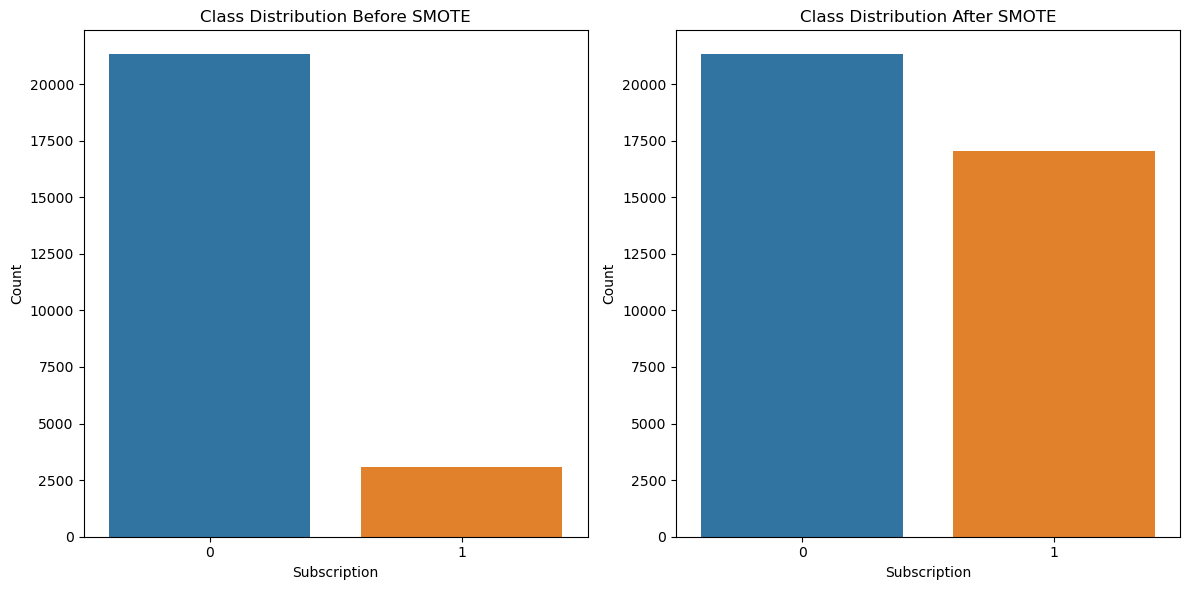

In [40]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Class Distribution Before SMOTE")
plt.xlabel('Subscription')
plt.ylabel('Count')

# After SMOTE (y_train_smote)
plt.subplot(1, 2, 2)
sns.countplot(x=pd.Series(y_train_smote))
plt.title("Class Distribution After SMOTE")
plt.xlabel('Subscription')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [41]:
X_train_smote.to_csv('dataset/X_train_smote.csv',sep=';', encoding='utf-8',index=False) 

In [42]:
y_train_smote.to_csv('dataset/y_train_smote.csv',sep=';', encoding='utf-8',index=False) 

In [43]:
X_test.to_csv('dataset/X_test.csv',sep=';', encoding='utf-8',index=False) 

In [44]:
y_test.to_csv('dataset/y_test.csv',sep=';', encoding='utf-8',index=False) 